In [3]:
# import relevant libraries

import numpy as np
import pandas as pd

url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv"

data = pd.read_csv(url)

data.sample(5)

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
579219,643637,469,3,2013-08-07,1348,1,0,0,0,8946
494206,548951,1003,6,2015-05-16,493,1,0,0,0,5361
125700,139697,871,1,2014-09-08,574,1,0,0,0,6910
367296,407965,1019,2,2015-06-09,603,1,0,0,0,7152
474028,526645,723,7,2013-09-08,0,0,0,0,0,0


In [36]:
export = data.to_csv("sales.csv", index=False)

In [5]:
data.shape

(640840, 10)

# EDA

In [6]:
data.dtypes

True_index              int64
Store_ID                int64
Day_of_week             int64
Date                   object
Nb_customers_on_day     int64
Open                    int64
Promotion               int64
State_holiday          object
School_holiday          int64
Sales                   int64
dtype: object

In [23]:
# Check null values

data.isnull().sum()

# Drop true_index and Date

data = data.drop(columns=['True_index', 'Date'])

In [27]:
# Counting the different values from school_holiday column

data['State_holiday'].value_counts()


State_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64

In [33]:
# one hot encoding 

data2 = pd.get_dummies(data, columns=['State_holiday'])

# transform dummies from boolean to integer

data2['State_holiday_0'] = data2['State_holiday_0'].astype(int)
data2['State_holiday_a'] = data2['State_holiday_a'].astype(int)
data2['State_holiday_b'] = data2['State_holiday_b'].astype(int)
data2['State_holiday_c'] = data2['State_holiday_c'].astype(int)

data2.sample(5)

,Store_ID,Day_of_week,Nb_customers_on_day,Open,Promotion,School_holiday,Sales,State_holiday_0,State_holiday_a,State_holiday_b,State_holiday_c
123922,618,5,549,1,1,0,7268,1,0,0,0
307950,490,5,1060,1,0,0,7478,1,0,0,0
253950,1052,2,860,1,1,0,9160,1,0,0,0
246633,126,1,750,1,1,0,9586,1,0,0,0
395535,848,2,910,1,1,1,8070,1,0,0,0


In [34]:
data2.dtypes

Store_ID               int64
Day_of_week            int64
Nb_customers_on_day    int64
Open                   int64
Promotion              int64
School_holiday         int64
Sales                  int64
State_holiday_0        int64
State_holiday_a        int64
State_holiday_b        int64
State_holiday_c        int64
dtype: object

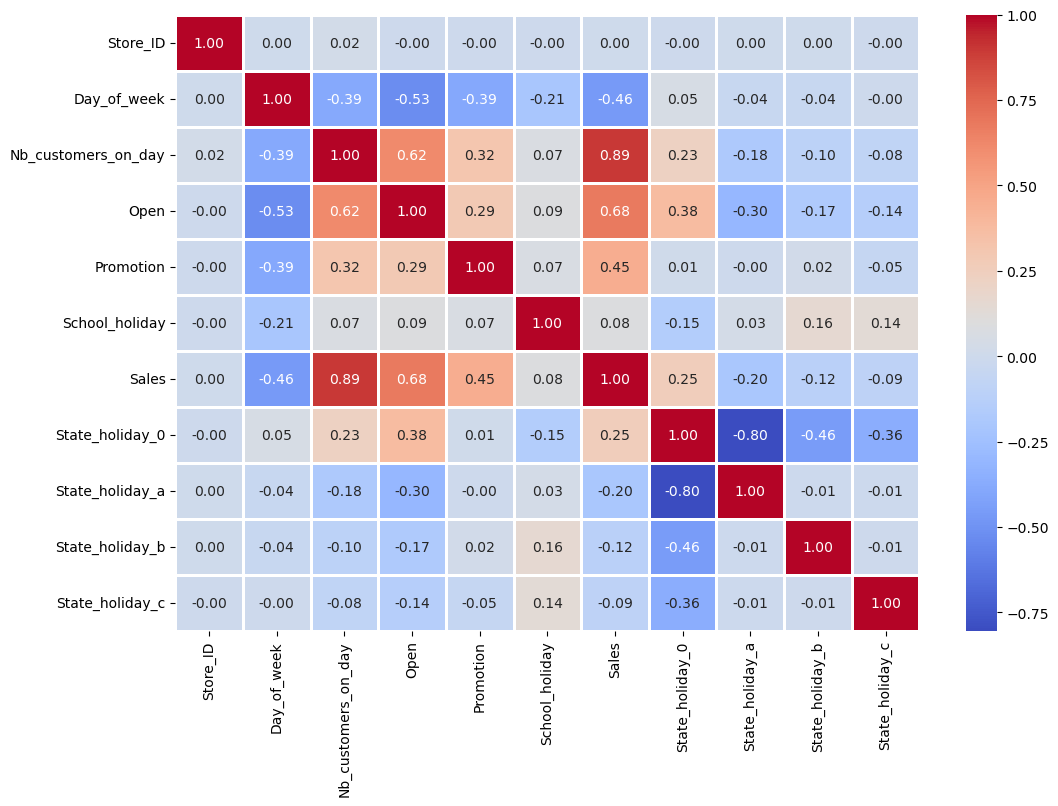

In [35]:
# Perform correlation matrix

data2.corr()

# Import relevant libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(data2.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

In the context of predicting sales using machine learning, the most suitable approach is typically to consider both positive and negative correlations, as they both provide valuable insights into the relationships between features and the target variable. Here's why:

Positive Correlations: Variables with a strong positive correlation to sales indicate features that tend to increase as sales increase. These are often directly influential on sales and are crucial to include in the model.

Negative Correlations: Variables with a strong negative correlation suggest features that tend to decrease as sales increase. These are equally important as they can help the model understand what factors might be suppressing sales.

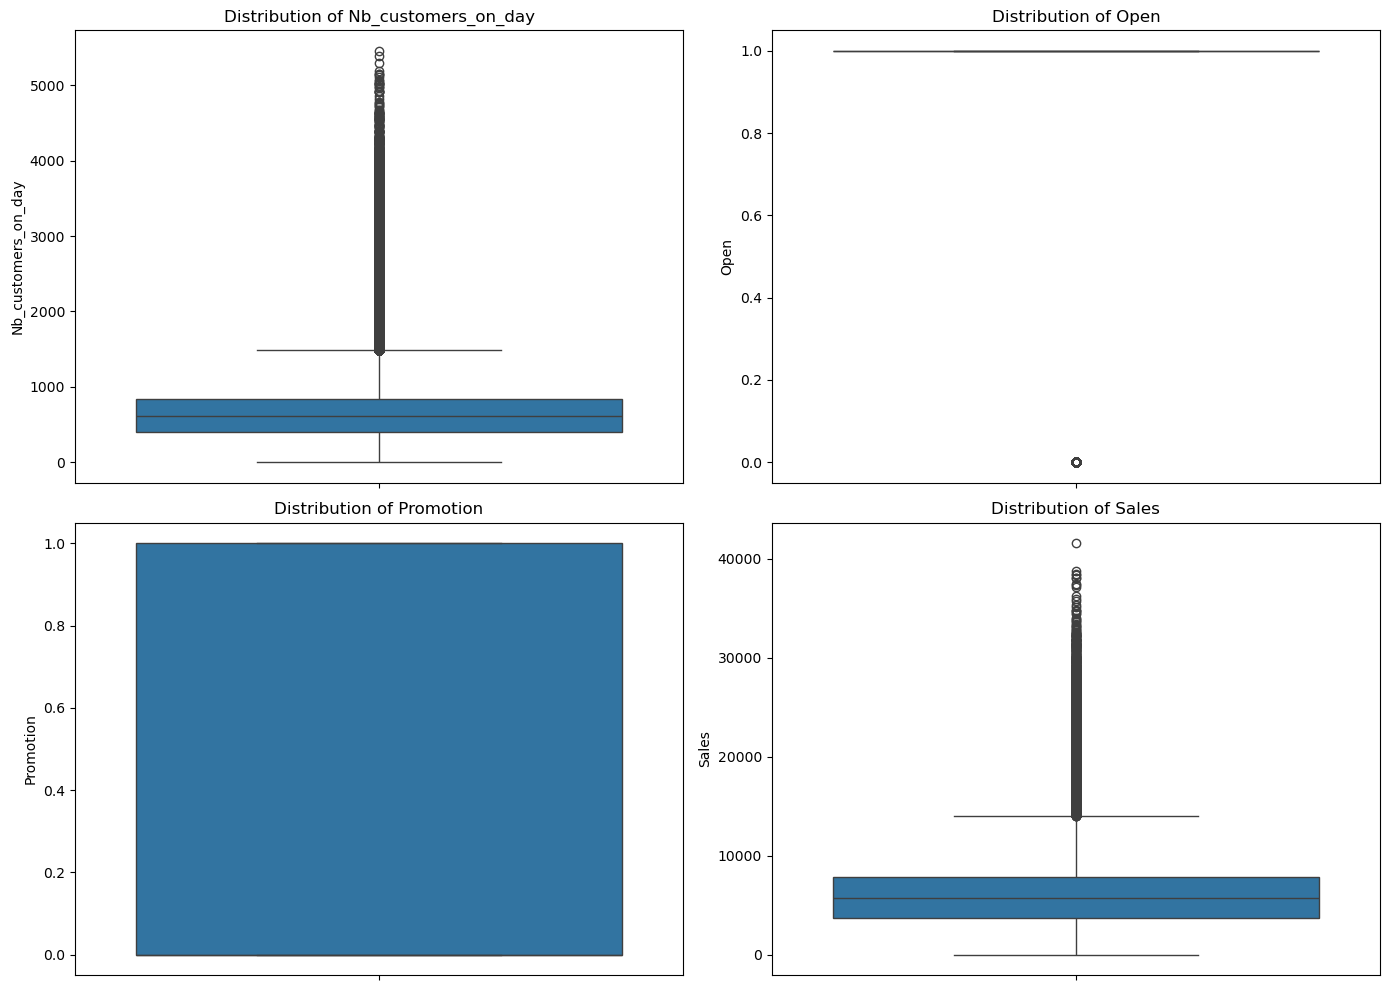

In [38]:
# Selecting the features with |correlation| > 0.3

selected_features = ['Nb_customers_on_day', 'Open', 'Promotion']

import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of selected features and the target variable to identify outliers

plt.figure(figsize=(14, 10))

for i, feature in enumerate(selected_features + ['Sales']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data[feature])
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


In [39]:
# Using z - score to remove outliers

from scipy import stats

# Calculate Z-scores for the selected features and the target variable

z_scores = stats.zscore(data[selected_features + ['Sales']])

# Identify outliers: points where Z-score is greater than 3 or less than -3

outliers = (abs(z_scores) > 3).any(axis=1)

# Extract the outlier rows

outliers_data = data[outliers]

# Summary of outliers

outliers_summary = outliers_data.describe()

# Number of outliers identified

num_outliers = outliers_data.shape[0]

outliers_summary, num_outliers

# Remove the identified outliers from the dataset

data_cleaned = data[~outliers]

# Display the shape of the cleaned dataset

cleaned_data_shape = data_cleaned.shape

cleaned_data_shape



(629897, 8)

In [44]:
#import train_test_split and linearregression from sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Splitting the cleaned data into features (X) and target (y)
X_cleaned = data_cleaned[selected_features]
y_cleaned = data_cleaned['Sales']

# Splitting the cleaned dataset into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42)

# Training the Linear Regression model on the cleaned data
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Predicting on the test set
y_pred_cleaned = model_cleaned.predict(X_test_cleaned)

# Evaluating the model
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
rmse_cleaned = mse_cleaned ** 0.5
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

mse_cleaned, rmse_cleaned, r2_cleaned


(np.float64(1698677.0055843005),
 np.float64(1303.3330370953927),
 0.8627880089650203)

In [46]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE

mae_cleaned = mean_absolute_error(y_test_cleaned, y_pred_cleaned)

# Compile results into a DataFrame

results_df = pd.DataFrame({
    "Model": ["Linear Regression (Cleaned Data)"],
    "MSE": [mse_cleaned],
    "RMSE": [rmse_cleaned],
    "MAE": [mae_cleaned],
    "R-squared": [r2_cleaned]
})


results_df


,Model,MSE,RMSE,MAE,R-squared
0,Linear Regression (Cleaned Data),1.698677e+06,1303.333037,910.418316,0.862788


In [47]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model

rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Train the model on the cleaned dataset

rf_model.fit(X_train_cleaned, y_train_cleaned)

# Predict on the test set

y_pred_rf = rf_model.predict(X_test_cleaned)

# Evaluate the model

mse_rf = mean_squared_error(y_test_cleaned, y_pred_rf)
rmse_rf = mse_rf ** 0.5
mae_rf = mean_absolute_error(y_test_cleaned, y_pred_rf)
r2_rf = r2_score(y_test_cleaned, y_pred_rf)

# Compile the results into a DataFrame

rf_results_df = pd.DataFrame({
    "Model": ["Random Forest (Cleaned Data)"],
    "MSE": [mse_rf],
    "RMSE": [rmse_rf],
    "MAE": [mae_rf],
    "R-squared": [r2_rf]
})

rf_results_df


,Model,MSE,RMSE,MAE,R-squared
0,Random Forest (Cleaned Data),1.653172e+06,1285.757527,878.947245,0.866464


In [50]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor

gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)

# Train the model on the cleaned data

gb_model.fit(X_train_cleaned, y_train_cleaned)

# Predict on the test set

y_pred_gb = gb_model.predict(X_test_cleaned)

# Evaluate the model

mse_gb = mean_squared_error(y_test_cleaned, y_pred_gb)
rmse_gb = mse_gb ** 0.5
mae_gb = mean_absolute_error(y_test_cleaned, y_pred_gb)
r2_gb = r2_score(y_test_cleaned, y_pred_gb)

# Compile the results into a DataFrame

gb_results_df = pd.DataFrame({
    "Model": ["Gradient Boosting (Cleaned Data)"],
    "MSE": [mse_gb],
    "RMSE": [rmse_gb],
    "MAE": [mae_gb],
    "R-squared": [r2_gb]
})

# Combine with the previous results

all_results_df = pd.concat([all_results_df, gb_results_df], ignore_index=True)

all_results_df


,Model,MSE,RMSE,MAE,R-squared
0,Linear Regression (Cleaned Data),1.698677e+06,1303.333037,910.418316,0.862788
1,Random Forest (Cleaned Data),1.653172e+06,1285.757527,878.947245,0.866464
2,Gradient Boosting (Cleaned Data),1.623446e+06,1274.145393,873.805236,0.868865
3,Gradient Boosting (Cleaned Data),1.623446e+06,1274.145393,873.805236,0.868865


In [52]:
# import xgboost

import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100)

xgb_model.fit(X_train_cleaned, y_train_cleaned)

y_pred_xgb = xgb_model.predict(X_test_cleaned)

mse_xgb = mean_squared_error(y_test_cleaned, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
mae_xgb = mean_absolute_error(y_test_cleaned, y_pred_xgb)
r2_xgb = r2_score(y_test_cleaned, y_pred_xgb)


xgb_results_df = pd.DataFrame({
    "Model": ["XGBoost (Cleaned Data)"],
    "MSE": [mse_xgb],
    "RMSE": [rmse_xgb],
    "MAE": [mae_xgb],
    "R-squared": [r2_xgb]
})

# Combine with the previous results
all_results_df = pd.concat([all_results_df, xgb_results_df], ignore_index=True)

# Print the results
print(all_results_df)


                              Model           MSE         RMSE         MAE  \
0  Linear Regression (Cleaned Data)  1.698677e+06  1303.333037  910.418316   
1      Random Forest (Cleaned Data)  1.653172e+06  1285.757527  878.947245   
2  Gradient Boosting (Cleaned Data)  1.623446e+06  1274.145393  873.805236   
3  Gradient Boosting (Cleaned Data)  1.623446e+06  1274.145393  873.805236   
4            XGBoost (Cleaned Data)  1.623720e+06  1274.252584  873.531545   

   R-squared  
0   0.862788  
1   0.866464  
2   0.868865  
3   0.868865  
4   0.868843  


Conclusion:

XGBoost and Gradient Boosting provide the best performance, making them the top choices for this sales prediction task.
Random Forest also performed well and could be a good alternative if you're looking for a simpler model with slightly faster training times.

### Tuning the best model (XGBoost)

Grid Search:

Grid Search is an exhaustive search method where we specify a grid of hyperparameters, and the algorithm evaluates the model performance (using cross-validation) for every combination of parameters.
Objective: The goal is to find the combination of hyperparameters that gives the best model performance based on a chosen metric (in this case, Mean Absolute Error, or MAE).
Hyperparameters Tuned for XGBoost:
n_estimators:

Number of boosting rounds (trees).
Values considered: [100, 200, 300]
learning_rate:

Step size shrinkage used to prevent overfitting by reducing the influence of each individual tree.
Values considered: [0.01, 0.05, 0.1]
max_depth:

Maximum depth of a tree, which controls how complex the trees are.
Values considered: [3, 5, 7]
subsample:

The fraction of samples used to grow each tree. It prevents overfitting by randomly sampling the data.
Values considered: [0.8, 0.9, 1.0]
colsample_bytree:

The fraction of features used to train each tree, which can help in controlling overfitting.
Values considered: [0.8, 0.9, 1.0]

In [54]:
# Define the hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up the grid search with cross-validation
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit the grid search
xgb_grid_search.fit(X_train_cleaned, y_train_cleaned)

# Best parameters and score
best_xgb_model = xgb_grid_search.best_estimator_
xgb_best_params = xgb_grid_search.best_params_
xgb_best_score = -xgb_grid_search.best_score_

print(f"Best XGBoost Params: {xgb_best_params}")
print(f"Best XGBoost MAE: {xgb_best_score}")


Best XGBoost Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best XGBoost MAE: 877.8668781633536


Best Hyperparameters:

- colsample_bytree: 0.8
- learning_rate: 0.05
- max_depth: 5
- n_estimators: 200
- subsample: 1.0

-Best Mean Absolute Error (MAE): 877.87

In [69]:
# import second test data

url2 = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/ironkaggle_notarget.csv"

df = pd.read_csv(url2)

df.sample(5)

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday
71044,710200,522,1,2015-04-20,602,1,0,0,0
14920,148890,79,2,2013-06-25,512,1,0,0,0
25936,259418,850,4,2015-05-21,616,1,1,0,0
53765,538564,109,7,2013-11-10,0,0,0,0,0
6675,66985,172,3,2015-02-18,780,1,1,0,1


In [70]:
data2 = df.copy()

data2.shape

(71205, 9)

In [71]:
data2.dtypes

True_index              int64
Store_ID                int64
Day_of_week             int64
Date                   object
Nb_customers_on_day     int64
Open                    int64
Promotion               int64
State_holiday          object
School_holiday          int64
dtype: object

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        # Select only the relevant features (No need for 'State_holiday' or dropping columns)
        ('select_features', 'passthrough', ['Nb_customers_on_day', 'Open', 'Promotion'])
    ]
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(objective='reg:squarederror', 
                               random_state=42, 
                               colsample_bytree=0.8, 
                               learning_rate=0.05, 
                               max_depth=5, 
                               n_estimators=200, 
                               subsample=1.0))
])

# Fit the pipeline on the training data
pipeline.fit(X_train_cleaned[['Nb_customers_on_day', 'Open', 'Promotion']], y_train_cleaned)

# Use the pipeline to predict on the new test data

new_predictions = pipeline.predict(data2[['Nb_customers_on_day', 'Open', 'Promotion']])

# If actual sales are available in the test set, calculate evaluation metrics

if 'Sales' in data2.columns:
    y_new_actual = data2['Sales']
    mae_new = mean_absolute_error(y_new_actual, new_predictions)
    rmse_new = mean_squared_error(y_new_actual, new_predictions) ** 0.5
    r2_new = r2_score(y_new_actual, new_predictions)
    
    print(f"MAE on new dataset: {mae_new}")
    print(f"RMSE on new dataset: {rmse_new}")
    print(f"R-squared on new dataset: {r2_new}")
else:
    # If actual sales are not available, just output the predictions
    print("Predictions on new dataset:")
    print(new_predictions)


Predictions on new dataset:
[-3.8874900e-01  4.3891396e+03  5.6593726e+03 ...  1.3872810e+04
 -3.8874900e-01  4.3932764e+03]


In [74]:
# Assuming we have actual sales data in the new dataset
if 'Sales' in data2.columns:
    y_new_actual = data2['Sales']
    
    # Calculate MAE
    mae_new = mean_absolute_error(y_new_actual, new_predictions_corrected)
    
    # Calculate MSE
    mse_new = mean_squared_error(y_new_actual, new_predictions_corrected)
    
    # Calculate RMSE
    rmse_new = mse_new ** 0.5
    
    # Calculate R-squared
    r2_new = r2_score(y_new_actual, new_predictions_corrected)
    
    # Create a DataFrame to organize the results
    results_df = pd.DataFrame({
        "Metric": ["MAE", "MSE", "RMSE", "R-squared"],
        "Value": [mae_new, mse_new, rmse_new, r2_new]
    })

    # Print the results
    print(results_df)

else:
    # If actual sales are not available, just output the predictions
    predictions_df = pd.DataFrame({"Predictions": new_predictions_corrected})
    print(predictions_df)


        Predictions
0          0.000000
1       4389.139648
2       5659.372559
3       3125.511963
4       3505.377441
...             ...
71200   6743.670410
71201   7649.869141
71202  13872.809570
71203      0.000000
71204   4393.276367

[71205 rows x 1 columns]


2. Analyze Prediction Distributions
Check the distribution of the predicted values. Do they follow a similar pattern to what you would expect based on your knowledge of the business?
Example: Use a histogram or box plot to visualize the spread of the predictions. If they are normally distributed or follow expected trends, that might be a positive sign.

In [87]:
# solutions 

url3 = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/ironkaggle_solutions.csv"

solutions = pd.read_csv(url3)


In [88]:
solutions.sample(5)

,True_index,Sales
34778,348428,8316.901367
16912,168516,4675.224609
1823,18496,6098.419922
30383,303740,4827.454102
58638,587122,5816.750977


In [89]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example: actual_sales_data should be a DataFrame containing the True_index and Sales columns
actual_sales_data = pd.DataFrame({
    'True_index': [348428, 168516, 18496, 303740, 587122],
    'Sales': [8316.901367, 4675.224609, 6098.419922, 4827.454102, 5816.750977]
})

# Assuming you have a DataFrame with your predictions and the True_index
predictions_df = pd.DataFrame({
    'True_index': [348428, 168516, 18496, 303740, 587122],
    'Predicted_Sales': [new_predictions_corrected[i] for i in range(5)]  # Replace with actual predictions
})

# Merge the actual sales with predictions on True_index
merged_df = pd.merge(actual_sales_data, predictions_df, on='True_index')

# Calculate the metrics
y_true = merged_df['Sales']
y_pred = merged_df['Predicted_Sales']

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_true, y_pred)

# Print the results
results_df = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R-squared"],
    "Value": [mae, mse, rmse, r2]
})

print(results_df)


      Metric         Value
0        MAE  2.611070e+03
1        MSE  1.553690e+07
2       RMSE  3.941688e+03
3  R-squared -8.110286e+00


In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'data2' is the dataset that includes the 'Sales' column and the relevant features
if 'Sales' in data2.columns:
    y_new_actual = data2['Sales']  # Define y_new_actual from the Sales column
    
    # Ensure features are aligned with what the model expects (e.g., drop unnecessary columns)
    X_new = data2[['Nb_customers_on_day', 'Open', 'Promotion']]  # Select only relevant features
    
    # Make predictions using the Random Forest model
    rf_predictions = rf_model.predict(X_new)
    
    # Apply a simple correction to ensure all predictions are non-negative
    rf_predictions_corrected = [max(0, pred) for pred in rf_predictions]
    
    # Calculate MAE
    mae_rf = mean_absolute_error(y_new_actual, rf_predictions_corrected)
    
    # Calculate MSE
    mse_rf = mean_squared_error(y_new_actual, rf_predictions_corrected)
    
    # Calculate RMSE
    rmse_rf = mse_rf ** 0.5
    
    # Calculate R-squared
    r2_rf = r2_score(y_new_actual, rf_predictions_corrected)
    
    # Create a DataFrame to organize the results
    rf_results_df = pd.DataFrame({
        "Metric": ["MAE", "MSE", "RMSE", "R-squared"],
        "Value": [mae_rf, mse_rf, rmse_rf, r2_rf]
    })

    # Print the results
    print(rf_results_df)

else:
    # If actual sales are not available, just output a placeholder message
    print("The 'Sales' column is not available in the dataset.")


The 'Sales' column is not available in the dataset.


In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'data2' is the dataset that includes the 'Sales' column and the relevant features
if 'Sales' in data2.columns:
    y_new_actual = data2['Sales']  # Define y_new_actual from the Sales column
    
    # Ensure features are aligned with what the model expects (e.g., drop unnecessary columns)
    X_new = data2[['Nb_customers_on_day', 'Open', 'Promotion']]  # Select only relevant features
    
    # Make predictions using the Random Forest model
    rf_predictions = rf_model.predict(X_new)
    
    # Apply a simple correction to ensure all predictions are non-negative
    rf_predictions_corrected = [max(0, pred) for pred in rf_predictions]
    
    # Calculate MAE
    mae_rf = mean_absolute_error(y_new_actual, rf_predictions_corrected)
    
    # Calculate MSE
    mse_rf = mean_squared_error(y_new_actual, rf_predictions_corrected)
    
    # Calculate RMSE
    rmse_rf = mse_rf ** 0.5
    
    # Calculate R-squared
    r2_rf = r2_score(y_new_actual, rf_predictions_corrected)
    
    # Create a DataFrame to organize the results
    rf_results_df = pd.DataFrame({
        "Metric": ["MAE", "MSE", "RMSE", "R-squared"],
        "Value": [mae_rf, mse_rf, rmse_rf, r2_rf]
    })

    # Print the results
    print("Random Forest Model Performance:")
    print(rf_results_df)

    # Optional: Compare with a baseline model (e.g., predicting the mean sales)
    baseline_prediction = y_new_actual.mean()  # Simple baseline: mean of actual sales
    baseline_predictions = [baseline_prediction] * len(y_new_actual)
    
    # Calculate metrics for the baseline model
    mae_baseline = mean_absolute_error(y_new_actual, baseline_predictions)
    mse_baseline = mean_squared_error(y_new_actual, baseline_predictions)
    rmse_baseline = mse_baseline ** 0.5
    r2_baseline = r2_score(y_new_actual, baseline_predictions)
    
    # Create a DataFrame to organize the baseline results
    baseline_results_df = pd.DataFrame({
        "Metric": ["MAE", "MSE", "RMSE", "R-squared"],
        "Value": [mae_baseline, mse_baseline, rmse_baseline, r2_baseline]
    })

    # Print the baseline results
    print("Baseline Model Performance:")
    print(baseline_results_df)

else:
    print("The 'Sales' column is not available in the dataset.")



The 'Sales' column is not available in the dataset.


In [96]:
# solutions 


url2 = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/ironkaggle_notarget.csv"

df2 = pd.read_csv(url2)

df2.sample(5)

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday
45098,451856,48,5,2014-07-18,363,1,1,0,1
63824,637683,49,1,2014-04-07,419,1,0,0,0
48224,482734,858,7,2014-05-25,0,0,0,0,0
16627,165778,13,5,2013-09-20,314,1,0,0,0
14515,145008,806,4,2015-05-14,0,0,0,a,0


In [98]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        # Select only the relevant features
        ('select_features', 'passthrough', ['Nb_customers_on_day', 'Open', 'Promotion'])
    ]
)

# Step 2: Define the pipeline with the Random Forest model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_estimators=100))
])

# Step 3: Fit the pipeline on your training data (you should replace X_train_cleaned and y_train_cleaned with your actual training data)
rf_pipeline.fit(X_train_cleaned[['Nb_customers_on_day', 'Open', 'Promotion']], y_train_cleaned)

# Step 4: Use the pipeline to predict on the new DataFrame (df2)
rf_predictions_df2 = rf_pipeline.predict(df2[['Nb_customers_on_day', 'Open', 'Promotion']])

# Apply a simple correction to ensure all predictions are non-negative
rf_predictions_df2_corrected = [max(0, pred) for pred in rf_predictions_df2]

# Step 5: If actual sales data is available in df2, calculate metrics
if 'Sales' in df2.columns:
    y_df2_actual = df2['Sales']
    
    # Calculate MAE
    mae_rf_df2 = mean_absolute_error(y_df2_actual, rf_predictions_df2_corrected)
    
    # Calculate MSE
    mse_rf_df2 = mean_squared_error(y_df2_actual, rf_predictions_df2_corrected)
    
    # Calculate RMSE
    rmse_rf_df2 = mse_rf_df2 ** 0.5
    
    # Calculate R-squared
    r2_rf_df2 = r2_score(y_df2_actual, rf_predictions_df2_corrected)
    
    # Print the results
    rf_results_df2 = pd.DataFrame({
        "Metric": ["MAE", "MSE", "RMSE", "R-squared"],
        "Value": [mae_rf_df2, mse_rf_df2, rmse_rf_df2, r2_rf_df2]
    })

    print("Random Forest Model Performance on df2:")
    print(rf_results_df2)
else:
    # If actual sales are not available, just output the predictions
    predictions_df2 = pd.DataFrame({"Predictions": rf_predictions_df2_corrected})
    print(predictions_df2)


        Predictions
0          0.000000
1       4379.318764
2       5563.436412
3       3042.160717
4       3485.706341
...             ...
71200   6744.013517
71201   7614.857234
71202  14807.025184
71203      0.000000
71204   4383.548123

[71205 rows x 1 columns]


In [100]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example: actual_sales_data should be a DataFrame containing the True_index and Sales columns
actual_sales_data = pd.DataFrame({
    'True_index': [348428, 168516, 18496, 303740, 587122],
    'Sales': [8316.901367, 4675.224609, 6098.419922, 4827.454102, 5816.750977]
})

# Filter predictions to match the actual_sales_data's True_index
predictions_df = pd.DataFrame({
    'True_index': df2['True_index'],  # Assuming df2 contains the full True_index column
    'Predicted_Sales': rf_predictions_df2_corrected
})

# Keep only the rows in predictions_df that have True_index values matching those in actual_sales_data
predictions_df = predictions_df[predictions_df['True_index'].isin(actual_sales_data['True_index'])]

# Merge the actual sales with predictions on True_index
merged_df = pd.merge(actual_sales_data, predictions_df, on='True_index')

# Calculate the metrics
y_true = merged_df['Sales']
y_pred = merged_df['Predicted_Sales']

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_true, y_pred)

# Print the results
results_df = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R-squared"],
    "Value": [mae, mse, rmse, r2]
})

print(results_df)



      Metric          Value
0        MAE     391.632232
1        MSE  177153.930877
2       RMSE     420.896580
3  R-squared       0.896123
